# The "Meetup in X" Dialogue Data

This notebook shows how to import the meetup dataset into our common format. (Or, actually, just into pandas dataframes.)

The "Meetup in X" task uses the "mapworld/ADE" environment described in `../MapWorld`; the task for the two players is to meet up in a room of a pre-specified type. They move on the same map, but don't see each other, even when in the same room.

References:
- [on github](https://github.com/clp-research/meetup)
- [the Semdial 2019 paper, Ilinykh et al](https://arxiv.org/abs/1907.05084)

In [1]:
from __future__ import division
import codecs
import json
import configparser
import os
import sys
import re

from glob import glob

from collections import defaultdict, Counter

from time import localtime, strftime

from textwrap import wrap


import pandas as pd
import numpy as np
from IPython.display import display, HTML

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# load config file, set up paths, make project-specific imports
config_path = os.environ.get('VISCONF')
if not config_path:
    # try default location, if not in environment
    default_path_to_config = '../../clp-vision/Config/default.cfg'
    if os.path.isfile(default_path_to_config):
        config_path = default_path_to_config

assert config_path is not None, 'You need to specify the path to the config file via environment variable VISCONF.'        

config = configparser.ConfigParser()
with open(config_path, 'r', encoding='utf-8') as f:
    config.read_file(f)

corpora_base = config.get('DEFAULT', 'corpora_base')

dsgv_home = config.get('DSGV-PATHS', 'dsgv_home')
sys.path.append(dsgv_home + '/Utils')
from utils import icorpus_code, get_image_filename

In [3]:
mux_base = corpora_base + '/meetupX'
os.environ['ADE_20k_PATH'] = config.get('ADE_20K', 'ade_base') + '/images/'

In [4]:
sys.path.append(mux_base + '/code')
from slurk_utils import logs_to_dfs, postproc_df, pp, parse_event_mu, reformat_dial_pp, plot_ade_row

In [5]:
mux_path = mux_base + '/data/meetupX'

dial_days = [
    '2018-11-29',
    '2018-11-30',
    '2018-12-01',
    '2018-12-02']

dials = [p for s in [glob(os.path.join(mux_path, good_dial, '*log')) for good_dial in dial_days] for p in s]

dial, meta_data = logs_to_dfs(dials, parser=parse_event_mu)
dial = [postproc_df(this_df) for this_df in dial]

In [6]:
len(dial)

430

As with all longer dialogue transcripts, this works particularly nicely in JupyterLab, where you can open additional views on output cells. So you can put this cell next to the main notebook, and look both at images (see below) and follow the transcript.

In [7]:
this_dial = dial[186]
reformat_dial_pp(this_dial)

d/dining_room


,time,A-private,public,B-private,user,receiver
10,0 days 00:00:04,GM: url: / s/ street/ ADE_train_00017635.jpg,,,GM,A
12,0 days 00:00:05,GM: You can go: [/ s]outh [/ w]est,,,GM,A
13,0 days 00:00:05,"GM: Welcome to the game, exuberant_geyser! You can always type the command/ look to see viable directions you can walk to. Type / doneif you think both of you are in the same room.",,,GM,A
14,0 days 00:00:05,GM: You have to meet in the room of type: d/ dining_room,,,GM,A
15,0 days 00:00:05,,,GM: url: / b/ bedroom/ ADE_train_00003895.jpg,GM,B
17,0 days 00:00:06,,,GM: You can go: [/ n]orth [/ e]ast [/ w]est,GM,B
18,0 days 00:00:06,,,"GM: Welcome to the game, blessed_hurricane! You can always type the command/ look to see viable directions you can walk to. Type / doneif you think both of you are in the same room.",GM,B
19,0 days 00:00:06,,,GM: You have to meet in the room of type: d/ dining_room,GM,B
20,0 days 00:00:14,,,B: cmd: e,B,All
21,0 days 00:00:15,,,GM: url: / s/ street/ ADE_train_00017635.jpg,GM,B


None

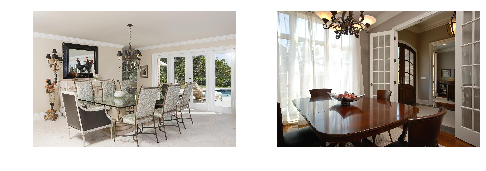

In [8]:
plot_ade_row(this_dial, 109)